In [19]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Define the URL of British Airways reviews on Skytrax
url = "https://www.airlinequality.com/airline-reviews/british-airways/"

# Headers to mimic a real browser
headers = {"User-Agent": "Mozilla/5.0"}

# Request the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract review content
reviews = soup.find_all("div", class_="text_content")

# Store reviews in a list
review_texts = [review.get_text(strip=True) for review in reviews]

# Save data to CSV
df = pd.DataFrame(review_texts, columns=["Review"])
# Create the 'data' directory if it doesn't exist
os.makedirs("data", exist_ok=True)
df.to_csv("data/ba_reviews.csv", index=False)

print("Reviews successfully scraped and saved!")

Reviews successfully scraped and saved!


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary libraries
nltk.download("stopwords")
nltk.download("punkt")

def clean_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase & tokenize
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words("english")]
    return " ".join(tokens)

# Apply to dataset
df["Cleaned_Review"] = df["Review"].apply(clean_text)
df.to_csv("data/ba_reviews_cleaned.csv", index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

df["Sentiment_Score"] = df["Cleaned_Review"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["Sentiment"] = df["Sentiment_Score"].apply(lambda x: "Positive" if x > 0.05 else "Negative" if x < -0.05 else "Neutral")

# Save updated dataset
df.to_csv("data/ba_reviews_sentiment.csv", index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


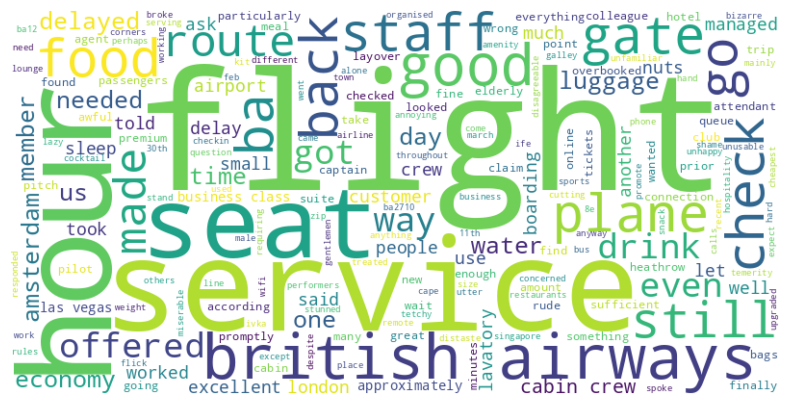

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["Cleaned_Review"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


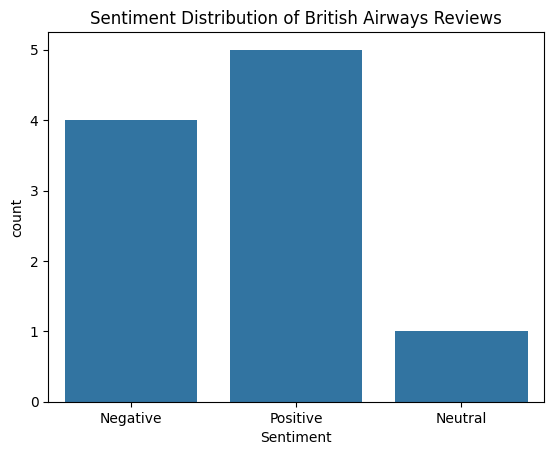

In [23]:
import seaborn as sns

sns.countplot(x=df["Sentiment"])
plt.title("Sentiment Distribution of British Airways Reviews")
plt.show()
